# Importing libraries and reading CSV files

In [1]:
#conda install -c conda-forge pandas-profiling

In [2]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv ('../datasets/train.csv')

| Feature                | File  | Description                                                                                                 |
|------------------------|-------|-------------------------------------------------------------------------------------------------------------|
| Date                   | Train | date that the WNV test is performed                                                                         |
| Address                | Train | approximate address of the location of trap\. This is used to send to the GeoCoder\.                        |
| Species                | Train | the species of mosquitos                                                                                    |
| Block                  | Train | block number of address                                                                                     |
| Street                 | Train | street name                                                                                                 |
| Trap                   | Train | Id of the trap                                                                                              |
| AddressNumberAndStreet | Train | approximate address returned from GeoCoder                                                                  |
| Latitude, Longitude    | Train | Latitude and Longitude returned from GeoCoder                                                               |
| AddressAccuracy        | Train | accuracy returned from GeoCoder                                                                             |
| NumMosquitos           | Train | number of mosquitoes caught in this trap                                                                    |
| WnvPresent             | Train | whether West Nile Virus was present in these mosquitos\. 1 means WNV is present, and 0 means not present\.  |



In [4]:
train.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')

In [5]:
train.columns = train.columns.map(lambda x: x.lower())

In [6]:
train.columns

Index(['date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'nummosquitos', 'wnvpresent'],
      dtype='object')

In [7]:
train.shape

(10506, 12)

In [8]:
train.dtypes

date                       object
address                    object
species                    object
block                       int64
street                     object
trap                       object
addressnumberandstreet     object
latitude                  float64
longitude                 float64
addressaccuracy             int64
nummosquitos                int64
wnvpresent                  int64
dtype: object

In [9]:
pp.ProfileReport(train)

In [10]:
# duplicate rows 
train[train.duplicated()].shape

(813, 12)

In [11]:
train[train.duplicated()].index

Int64Index([   99,   295,   351,   353,   512,   531,   548,   587,   588,
              589,
            ...
             9902,  9969,  9975,  9976,  9992, 10013, 10102, 10124, 10262,
            10392],
           dtype='int64', length=813)

### Date

In [12]:
train.date.isnull().sum()

0

In [13]:
train['date']

0        2007-05-29
1        2007-05-29
2        2007-05-29
3        2007-05-29
4        2007-05-29
            ...    
10501    2013-09-26
10502    2013-09-26
10503    2013-09-26
10504    2013-09-26
10505    2013-09-26
Name: date, Length: 10506, dtype: object

In [14]:
train['date'] = train['date'].str.split('-')
train['date']

0        [2007, 05, 29]
1        [2007, 05, 29]
2        [2007, 05, 29]
3        [2007, 05, 29]
4        [2007, 05, 29]
              ...      
10501    [2013, 09, 26]
10502    [2013, 09, 26]
10503    [2013, 09, 26]
10504    [2013, 09, 26]
10505    [2013, 09, 26]
Name: date, Length: 10506, dtype: object

In [15]:
train['year'] = [y[0] for y in train['date']]
train['year']

0        2007
1        2007
2        2007
3        2007
4        2007
         ... 
10501    2013
10502    2013
10503    2013
10504    2013
10505    2013
Name: year, Length: 10506, dtype: object

In [16]:
train['month'] = [y[1] for y in train['date']]
train['month']

0        05
1        05
2        05
3        05
4        05
         ..
10501    09
10502    09
10503    09
10504    09
10505    09
Name: month, Length: 10506, dtype: object

In [17]:
train['day'] = [y[2] for y in train['date']]
train['day']

0        29
1        29
2        29
3        29
4        29
         ..
10501    26
10502    26
10503    26
10504    26
10505    26
Name: day, Length: 10506, dtype: object

### Species

In [18]:
train.species.isnull().sum()

0

In [19]:
train['species'].value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: species, dtype: int64

Since there are 4 species with low value counts, we will merge the 3 columns into others

In [20]:
train.species = train.species.map({'CULEX PIPIENS/RESTUANS': 'CULEX PIPIENS/RESTUANS',
                                   'CULEX RESTUANS': 'CULEX RESTUANS',
                                   'CULEX PIPIENS': 'CULEX PIPIENS',
                                   'CULEX TERRITANS': 'CULEX OTHER', 
                                   'CULEX SALINARIUS': 'CULEX OTHER',
                                   'CULEX TARSALIS': 'CULEX OTHER',
                                   'CULEX ERRATICUS': 'CULEX OTHER'})

In [21]:
train['species'].value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX OTHER                315
Name: species, dtype: int64

### Block

In [22]:
train.block.isnull().sum()

0

In [23]:
train['block'].unique()

array([41, 62, 79, 15, 25, 11, 21, 22, 17, 53, 65, 75, 89, 91, 36, 72, 38,
       49, 58, 50, 14, 10, 42, 40, 43, 28, 18, 70, 35, 93, 37, 45, 46, 60,
       61, 27, 68, 30, 96, 64, 12, 20, 33, 52, 67, 73, 39, 47, 55, 71, 77,
       63, 13, 81, 24, 80, 82, 98, 66, 48, 51, 90, 29, 34], dtype=int64)

### Address

In [24]:
train.address.isnull().sum()

0

In [25]:
train['address'].value_counts().to_dict()

{"ORD Terminal 5, O'Hare International Airport, Chicago, IL 60666, USA": 750,
 'South Doty Avenue, Chicago, IL, USA': 542,
 'South Stony Island Avenue, Chicago, IL, USA': 314,
 '4100 North Oak Park Avenue, Chicago, IL 60634, USA': 185,
 '4200 West 127th Street, Alsip, IL 60803, USA': 183,
 '2200 North Cannon Drive, Chicago, IL 60614, USA': 163,
 '2400 East 105th Street, Chicago, IL 60617, USA': 160,
 '7000 West Armitage Avenue, Chicago, IL 60707, USA': 156,
 '3700 118th Street, Chicago, IL 60617, USA': 152,
 'University of Illinois at Chicago, 1100 South Ashland Avenue, Chicago, IL 60607, USA': 151,
 '5200 South Kolmar Avenue, Chicago, IL 60632, USA': 148,
 '3500 West 116th Street, Chicago, IL 60655, USA': 147,
 '1100 Roosevelt Road, Chicago, IL 60608, USA': 146,
 '5000 South Central Avenue, Chicago, IL 60638, USA': 146,
 'Ohare Court, Bensenville, IL 60106, USA': 140,
 '7000 North Moselle Avenue, Chicago, IL 60646, USA': 139,
 '3600 North Pittsburgh Avenue, Chicago, IL 60634, USA': 13

### Address Number and Street

In [26]:
train.addressnumberandstreet.isnull().sum()

0

In [27]:
train['addressnumberandstreet'].value_counts().to_dict()

{'1000  W OHARE AIRPORT, Chicago, IL': 750,
 '1200  S DOTY AVE, Chicago, IL': 542,
 '1000  S STONY ISLAND AVE, Chicago, IL': 314,
 '4100  N OAK PARK AVE, Chicago, IL': 185,
 '4200  W 127TH PL, Chicago, IL': 183,
 '2200  N CANNON DR, Chicago, IL': 163,
 '2400  E 105TH ST, Chicago, IL': 160,
 '7000   W ARMITAGE AVENUE, Chicago, IL': 156,
 '3700  E 118TH ST, Chicago, IL': 152,
 '1100  S ASHLAND AVE, Chicago, IL': 151,
 '5200  S KOLMAR, Chicago, IL': 148,
 '3500  W 116TH ST, Chicago, IL': 147,
 '1100  W ROOSEVELT, Chicago, IL': 146,
 '5000  S CENTRAL AVE, Chicago, IL': 146,
 '1000  W OHARE, Chicago, IL': 140,
 '7000  N MOSELL AVE, Chicago, IL': 139,
 '3600  N PITTSBURGH AVE, Chicago, IL': 133,
 '1300  S BRANDON, Chicago, IL': 130,
 '1300  S TORRENCE AVE, Chicago, IL': 129,
 '1000  E 67TH ST, Chicago, IL': 128,
 '1000  N CENTRAL PARK DR, Chicago, IL': 126,
 '4600  N MILWAUKEE AVE, Chicago, IL': 122,
 '1700  W 95TH ST, Chicago, IL': 121,
 '5800  N WESTERN AVE, Chicago, IL': 117,
 '6700  S KE

### Address Accuracy

In [28]:
train.addressaccuracy.isnull().sum()

0

In [29]:
train.addressaccuracy.value_counts()

8    4628
9    3980
5    1807
3      91
Name: addressaccuracy, dtype: int64

### No. of Mosquitos

In [30]:
train.nummosquitos.isnull().sum()

0

In [31]:
train.nummosquitos.unique()

array([ 1,  4,  2,  3,  5,  9,  7, 10,  8,  6, 19, 20, 25, 16, 11, 12, 28,
       18, 50, 35, 14, 22, 21, 37, 27, 13, 39, 29, 15, 17, 34, 26, 32, 47,
       44, 23, 46, 48, 42, 33, 45, 24, 41, 38, 40, 36, 43, 49, 30, 31],
      dtype=int64)

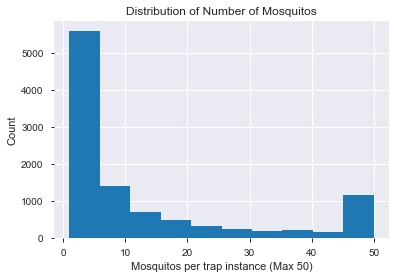

In [32]:
train.nummosquitos.hist()
plt.title('Distribution of Number of Mosquitos')
plt.xlabel('Mosquitos per trap instance (Max 50)')
plt.ylabel('Count')
plt.show()

### Trap

In [33]:
train.trap.isnull().sum()

0

In [34]:
train.trap.value_counts()

T900     750
T115     542
T138     314
T002     185
T135     183
        ... 
T238       7
T094B      5
T076       5
T237       3
T040       2
Name: trap, Length: 136, dtype: int64

In [35]:
train.trap.unique()

array(['T002', 'T007', 'T015', 'T045', 'T046', 'T048', 'T049', 'T050',
       'T054', 'T086', 'T091', 'T094', 'T096', 'T129', 'T143', 'T148',
       'T153', 'T159', 'T009', 'T011', 'T016', 'T019', 'T025', 'T028',
       'T031', 'T033', 'T089', 'T090', 'T092', 'T135', 'T141', 'T142',
       'T145', 'T146', 'T147', 'T149', 'T150', 'T151', 'T152', 'T154',
       'T158', 'T162', 'T218', 'T220', 'T001', 'T003', 'T006', 'T008',
       'T012', 'T034', 'T037', 'T040', 'T043', 'T047', 'T051', 'T085',
       'T088', 'T161', 'T219', 'T013', 'T014', 'T018', 'T030', 'T084',
       'T144', 'T160', 'T005', 'T017', 'T044', 'T095', 'T004', 'T035',
       'T036', 'T039', 'T060', 'T061', 'T062', 'T065', 'T066', 'T067',
       'T069', 'T070', 'T071', 'T073', 'T074', 'T075', 'T076', 'T077',
       'T079', 'T080', 'T081', 'T082', 'T083', 'T114', 'T155', 'T063',
       'T115', 'T138', 'T200', 'T206', 'T209', 'T212', 'T215', 'T107',
       'T128', 'T072', 'T078', 'T097', 'T099', 'T100', 'T102', 'T103',
      

### Latitude

In [36]:
train.latitude.isnull().sum()

0

In [37]:
train['latitude'].unique()

array([41.95469 , 41.994991, 41.974089, 41.9216  , 41.891118, 41.867108,
       41.896282, 41.919343, 41.921965, 41.688324, 41.862292, 41.720848,
       41.731922, 41.891126, 41.999129, 42.01743 , 41.907645, 41.732984,
       41.981964, 41.944869, 42.011601, 41.94983 , 41.979243, 41.986921,
       41.801498, 41.906638, 41.723195, 41.868077, 41.869216, 41.662014,
       41.961743, 41.953067, 41.878114, 41.958271, 41.932094, 41.994469,
       42.006858, 41.916265, 41.846075, 41.918705, 41.682587, 41.725517,
       41.948167, 41.963976, 41.953705, 41.964242, 41.990284, 42.008314,
       41.991429, 41.843811, 41.921177, 41.852652, 41.857402, 41.868142,
       41.846283, 41.721474, 41.869107, 41.719059, 41.966987, 41.923738,
       41.970248, 42.010412, 41.89923 , 41.692555, 41.94016 , 41.903002,
       41.942114, 41.960616, 41.883284, 41.704336, 41.962728, 41.836644,
       41.837085, 41.911824, 41.823065, 41.801179, 41.800737, 41.778297,
       41.77166 , 41.759346, 41.768388, 41.797616, 

### Longitude

In [38]:
train.longitude.isnull().sum()

0

In [39]:
train['longitude'].unique()

array([-87.800991, -87.769279, -87.824812, -87.666455, -87.654491,
       -87.654224, -87.655232, -87.694259, -87.632085, -87.676709,
       -87.64886 , -87.666014, -87.677512, -87.61156 , -87.795585,
       -87.687769, -87.760886, -87.649642, -87.812827, -87.832763,
       -87.811506, -87.698457, -87.750938, -87.689778, -87.763416,
       -87.701431, -87.64997 , -87.666901, -87.627561, -87.724608,
       -87.76007 , -87.776792, -87.629798, -87.702575, -87.700117,
       -87.667736, -87.675919, -87.800515, -87.716277, -87.752329,
       -87.707973, -87.614258, -87.730698, -87.69181 , -87.733974,
       -87.757639, -87.797127, -87.777921, -87.747113, -87.686763,
       -87.79518 , -87.719887, -87.694991, -87.696269, -87.656913,
       -87.648064, -87.696293, -87.675088, -87.674677, -87.785288,
       -87.787992, -87.66214 , -87.716788, -87.598865, -87.794896,
       -87.688267, -87.776385, -87.777189, -87.705085, -87.703736,
       -87.748367, -87.677737, -87.729384, -87.726737, -87.678

### WNV Presence

In [40]:
train.wnvpresent.isnull().sum()

0

In [41]:
train.wnvpresent.value_counts()

0    9955
1     551
Name: wnvpresent, dtype: int64

In [42]:
train.wnvpresent.mean()

0.05244622120692937

In [43]:
train.groupby(by='species')['wnvpresent'].value_counts()

species                 wnvpresent
CULEX OTHER             0              315
CULEX PIPIENS           0             2459
                        1              240
CULEX PIPIENS/RESTUANS  0             4490
                        1              262
CULEX RESTUANS          0             2691
                        1               49
Name: wnvpresent, dtype: int64

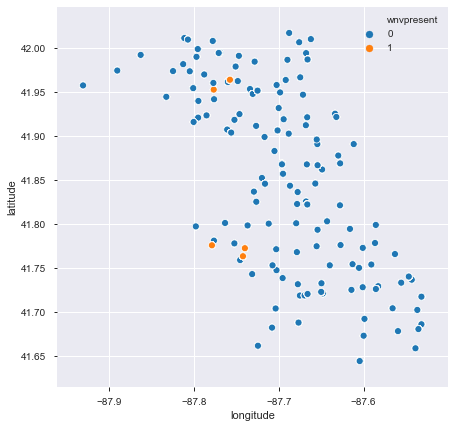

In [44]:
x = train['longitude']
y = train['latitude']

plt.figure(figsize=(7,7))
sns.scatterplot(x,y,hue=train['wnvpresent'])

plt.show()

In [45]:
pd.get_option("display.max_columns")

20

In [46]:
train.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,year,month,day
0,"[2007, 05, 29]","4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,05,29
1,"[2007, 05, 29]","4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,05,29
2,"[2007, 05, 29]","6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007,05,29
3,"[2007, 05, 29]","7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,2007,05,29
4,"[2007, 05, 29]","7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,2007,05,29
